In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten

In [2]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import PIL

In [3]:
path='D:\\redmi note 10 pro\\New folder'
folder=['picsarr']
data=[]
labels=[]
for i in folder:
    paths=os.path.join(path,i)
    for j in os.listdir(paths):
        label=folder.index(i)
        imgpath=os.path.join(paths,j)
        img=cv.imread(str(imgpath))
        data.append([img])
        labels.append([label])

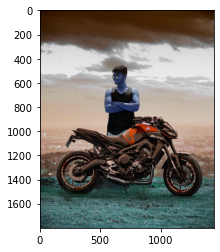

In [4]:
plt.imshow(data[80][0])

In [5]:
labels[80]

[0]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,train_size=0.8)

In [7]:
len(X_train)

66

In [8]:
len(X_test)

17

In [9]:
xtr=np.array(X_train)/255
xte=np.array(X_test)/255

C:\Users\Arbaj\AppData\Local\Temp\ipykernel_1152\990340876.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xtr=np.array(X_train)/255


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [10]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [11]:
len(X_train)

50000

In [12]:
len(X_test)

10000

In [13]:
y_test[1]

array([8], dtype=uint8)

In [14]:
xtr=np.array(X_train)/255
xte=np.array(X_test)/255

In [15]:
xtr.shape[1:]

(32, 32, 3)

In [16]:
input_layer=layers.Input(shape=(xtr.shape[1:]))
con1=Conv2D(100,kernel_size=(4,4),padding='same',activation='relu')(input_layer)
max1=MaxPooling2D((3,3))(con1)
con2=Conv2D(200,kernel_size=(4,4),padding='same',activation='relu')(max1)
max2=MaxPooling2D((3,3))(con2)
con3=Conv2D(100,kernel_size=(4,4),padding='same',activation='relu')(max2)
max3=MaxPooling2D((3,3))(con3)
flat=Flatten()(max3)
den1=Dense(64,activation='relu')(flat)
drp=Dropout(0.2)(den1)
den2=Dense(64,activation='relu')(drp)
output_layer=Dense(10, activation='softmax')(den2)
Model=Sequential()
from keras.models import Model
model1 = Model(inputs=input_layer, outputs=output_layer)
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
model1.fit(xtr,y_train,batch_size=10,epochs=10)
model1.evaluate(xte,y_test)

Epoch 1/10
5000/5000 [==============================] - 37s 7ms/step - loss: 1.6169 - accuracy: 0.4042
Epoch 2/10
5000/5000 [==============================] - 36s 7ms/step - loss: 1.2215 - accuracy: 0.5679
Epoch 3/10
5000/5000 [==============================] - 37s 7ms/step - loss: 1.0690 - accuracy: 0.6277
Epoch 4/10
5000/5000 [==============================] - 37s 7ms/step - loss: 0.9734 - accuracy: 0.6632
Epoch 5/10
5000/5000 [==============================] - 36s 7ms/step - loss: 0.8888 - accuracy: 0.6938
Epoch 6/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.8293 - accuracy: 0.7143
Epoch 7/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7690 - accuracy: 0.7336
Epoch 8/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7237 - accuracy: 0.7503
Epoch 9/10
5000/5000 [==============================] - 34s 7ms/step - loss: 0.6793 - accuracy: 0.7669
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss

[0.9207907915115356, 0.6984000205993652]

In [19]:
model1.fit(xtr,y_train,epochs=10)
model1.evaluate(xte,y_test)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.